In [1]:
# User tries to use the Client object or uses multiprocessing in an unexpected way (especially when first starting out)
# they can run in to this error: RuntimeError: An attempt has been made to start a new process before the current process
# has finished its bootstrapping phase. This probably means that you are not using fork to start your child processes
# and you have forgotten to use the proper idiom in the main module:
if __name__ == '__main__':

    # Load Packages
    import nltk
    import re
    import numpy as np
    import pandas as pd
    import gensim
    import gensim.corpora as corpora
    import seaborn as sns
    from gensim.models import CoherenceModel
    import spacy
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    import pyLDAvis
    import pyLDAvis.gensim
    import matplotlib.pyplot as plt
    from nltk import FreqDist
    from nltk.corpus import stopwords
    from unidecode import unidecode
    import warnings
    warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
    # Setting display options for pycharm result window
    pd.set_option('display.width', 8000)
    pd.set_option('display.max_columns', 50)

    # Import csv
    df = pd.read_csv(r'C:\Vaibhav\Graduate College Programs\Georgia State\MSA 8040\Projects\Web_Scraping_Toy_Story_Combined_Movie_Results.csv')

    toy_story_df = df.loc[df['movie'] == 'Toy Story']
    toy_story2_df = df.loc[df['movie'] == 'Toy Story 2']
    toy_story3_df = df.loc[df['movie'] == 'Toy Story 3']
    toy_story4_df = df.loc[df['movie'] == 'Toy Story 4']

In [4]:
# Toy Story
toy_story_df.head()

,id,movie,rating_score,review_text
0,0,Toy Story,5.0,With major innovations in animation and great ...
1,1,Toy Story,5.0,"Great voice cast, Great screenplay, Great grap..."
2,2,Toy Story,5.0,Simply the best movie of pixar👍
3,3,Toy Story,3.5,"""Toy Story"" has some great one-liners and is q..."
4,4,Toy Story,5.0,Gostei muito da história e da na trama de onde...


In [5]:
# Toy Story 2
toy_story2_df.head()

,id,movie,rating_score,review_text
30786,30786,Toy Story 2,4.0,Good movie and funny
30787,30787,Toy Story 2,5.0,Great movie the entire family can enjoy.
30788,30788,Toy Story 2,3.5,"Even if not as interesting as its predecessor,..."
30789,30789,Toy Story 2,5.0,Great sequel to the first pixar film love it.
30790,30790,Toy Story 2,5.0,One of the few great sequels. It takes the Toy...


In [6]:
# Toy Story 3
toy_story3_df.head()

,id,movie,rating_score,review_text
54055,54055,Toy Story 3,5.0,"This movie is heart warming, entertaining, act..."
54056,54056,Toy Story 3,3.5,Un poco aburrida pero buena
54057,54057,Toy Story 3,4.0,We have to praise Pixar for reinventing for th...
54058,54058,Toy Story 3,4.5,Brilliantly imaginative and hilarious. Best pa...
54059,54059,Toy Story 3,5.0,Another great sequel of the first pixar film w...


In [7]:
# Toy Story 4
toy_story4_df.head()

,id,movie,rating_score,review_text
70995,70995,Toy Story 4,4.0,Now you have to see this in the way that a chi...
70996,70996,Toy Story 4,4.5,one of the best ever animated movie series is ...
70997,70997,Toy Story 4,5.0,"The movie is fantastic, one of the greatest pe..."
70998,70998,Toy Story 4,4.0,They have done it again. Smart and sweet; love...
70999,70999,Toy Story 4,2.0,It was disappointing and worst of all forgetta...


In [3]:
    # Initial Plot Function of most frequently used words
    def initial_word_frequency_barplot(df, word):
        # Joining reviews for all rows together, then splitting on each word
        all_words_in_review = ' '.join([text for text in df])
        all_words_in_review = all_words_in_review.split()

        # Word Frequency Counter
        word_freq_counter = FreqDist(all_words_in_review)
        review_words_df = pd.DataFrame({'words': list(word_freq_counter.keys()), 'count': list(word_freq_counter.values())})

        # Selecting the top 30 most used words to plot
        col_select = review_words_df.nlargest(columns='count', n=word)
        plt.figure(figsize=(30, 5))
        ax = sns.barplot(data=col_select, x='words', y='count', palette='rocket')
        ax.set_ylabel(ylabel='Count', fontsize=20)
        ax.set_xlabel(xlabel='Word', fontsize=20)
        plt.xticks(rotation=45, ha="right", fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

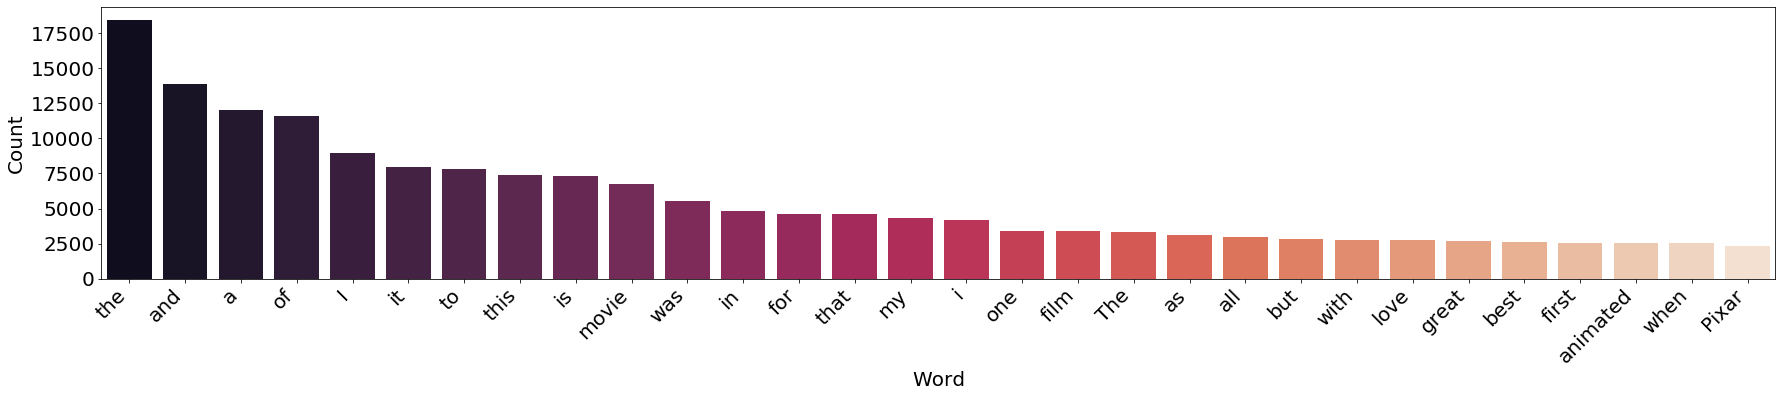

In [23]:
# Initial Plot of most frequently used words (before data clean)
# Toy Story
initial_word_frequency_barplot(toy_story_df['review_text'], 30)

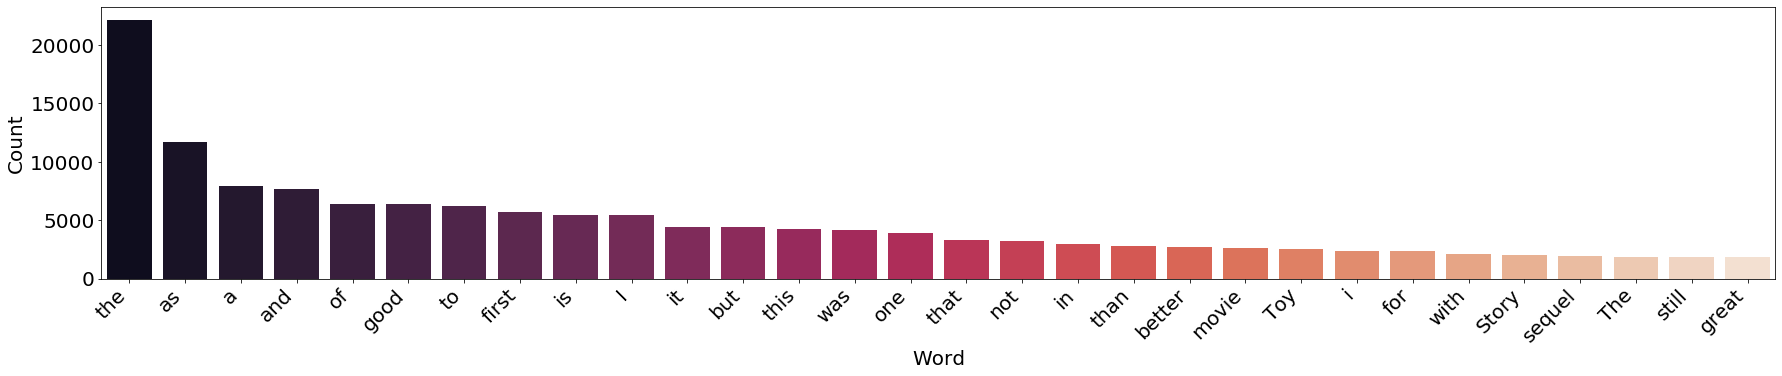

In [24]:
# Initial Plot of most frequently used words (before data clean)
# Toy Story 2 
initial_word_frequency_barplot(toy_story2_df['review_text'], 30)

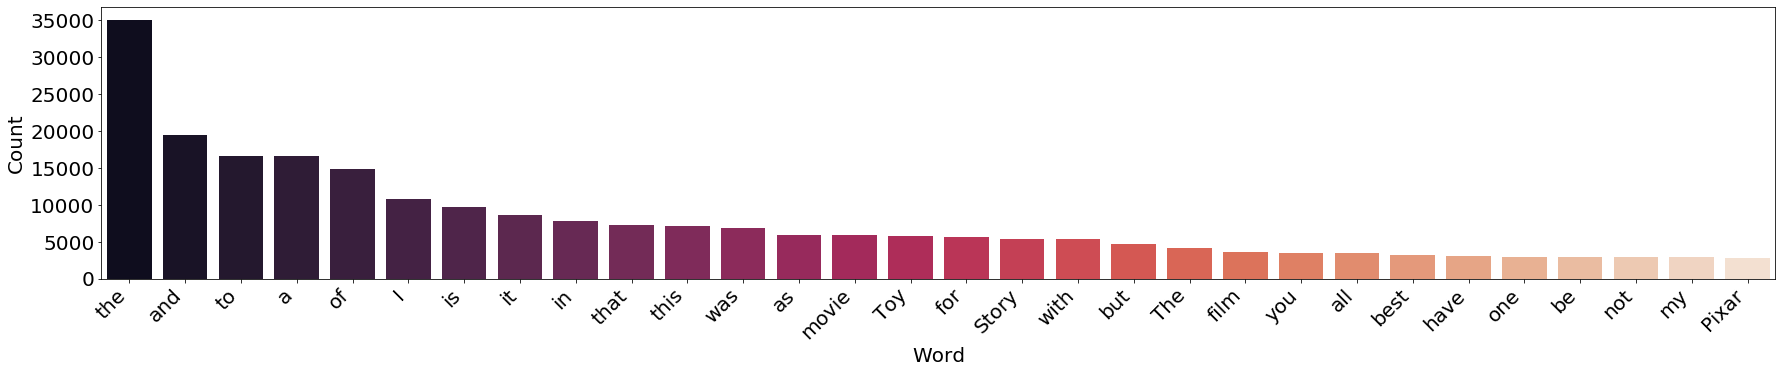

In [25]:
# Initial Plot of most frequently used words (before data clean)
# Toy Story 3
initial_word_frequency_barplot(toy_story3_df['review_text'], 30)

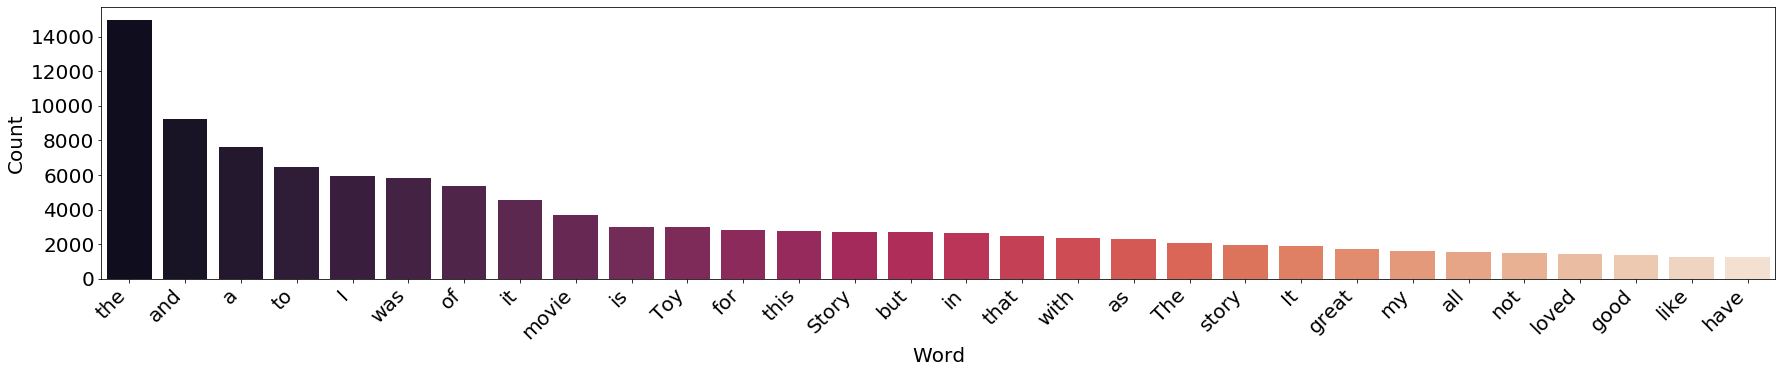

In [26]:
# Initial Plot of most frequently used words (before data clean)
# Toy Story 4
initial_word_frequency_barplot(toy_story4_df['review_text'], 30)

In [4]:
    # Function used for data clean
    def text_clean(df):
        # Joining reviews for all rows together, then splitting on each word
        data = ' '.join([text for text in df if text not in df])
        data = data.split()

        # Store all dataframe column row values into array
        new_data = []

        # Remove numbers, symbols, special, and foreign characters
        for data in data:
            new_data.append(data.replace('~', '').replace('`', '').replace('!', '').replace('@', '').replace('#', '').replace('$', '')\
                .replace('%', '').replace('^', '').replace('&', '').replace('*', '').replace('(', '').replace(')', '')\
                .replace('-', ' ').replace('_', ' ').replace('+', '').replace('=', '').replace('[', '').replace('{', '')\
                .replace(']', '').replace('}', '').replace(';', '').replace(':', '').replace('"', '').replace(',', '')\
                .replace('<', '').replace('.', '').replace('>', '').replace('/', '').replace('?', '').replace('1', '')\
                .replace('2', '').replace('3', '').replace('4', '').replace('5', '').replace('6', '').replace('7', '')\
                .replace('8', '').replace('9', '').replace("'", '').replace(data, unidecode(data)))

        # After removing unnecessary characters, make the lines lowercase
        new_data = [data.lower() for data in new_data]
        return new_data

In [5]:
    def remove_url(df):
        # Remove URLs
        delete_urls = [element for element in df if 'http' not in element]
        return delete_urls

In [6]:
    # Remove Stopwords Function
    def remove_stop_words(df):
        # Remove stopwords
        stop_words = stopwords.words('english')
        stop_word_filter = [text for text in df if text not in stop_words]

        while '' in stop_word_filter:
            stop_word_filter.remove('')

        return stop_word_filter

In [7]:
    # Remove Short words Function
    def remove_short_words(df):
        short_word_filter = [word for word in df if len(word) > 3]
        return short_word_filter

In [8]:
    # Function to plot after tokenizing
    def new_word_frequency_barplot(df, word):
        # Word frequency counter after tokenizing
        word_freq_counter = FreqDist(df)
        review_words_df = pd.DataFrame({'words': list(word_freq_counter.keys()), 'count': list(word_freq_counter.values())})

        # Selecting the top 30 most used words to plot
        col_select = review_words_df.nlargest(columns='count', n=word)
        plt.figure(figsize=(30, 5))
        ax = sns.barplot(data=col_select, x='words', y='count', palette='rocket')
        ax.set_ylabel(ylabel='Count', fontsize=20)
        ax.set_xlabel(xlabel='Word', fontsize=20)
        plt.xticks(rotation=45, ha="right", fontsize=20)
        plt.yticks(fontsize=20)
        plt.show()

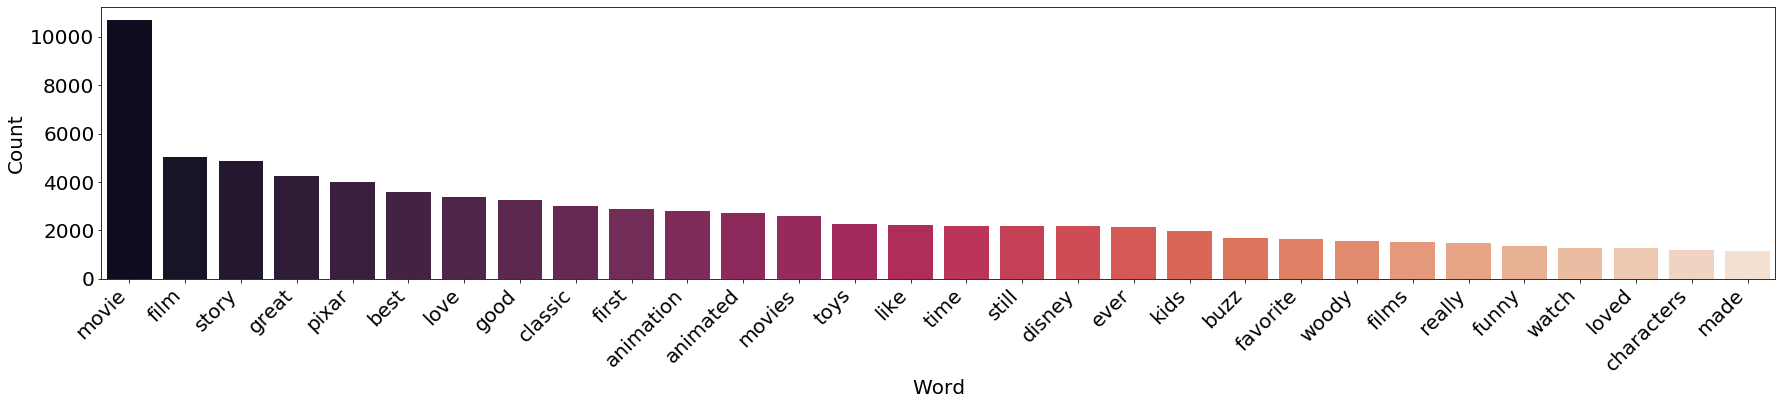

In [44]:
# Plots after removing stop words, short words, urls, numbers, special characters, etc (tokenizing)
# Toy Story
new_word_frequency_barplot(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story_df['review_text'])))), 30)

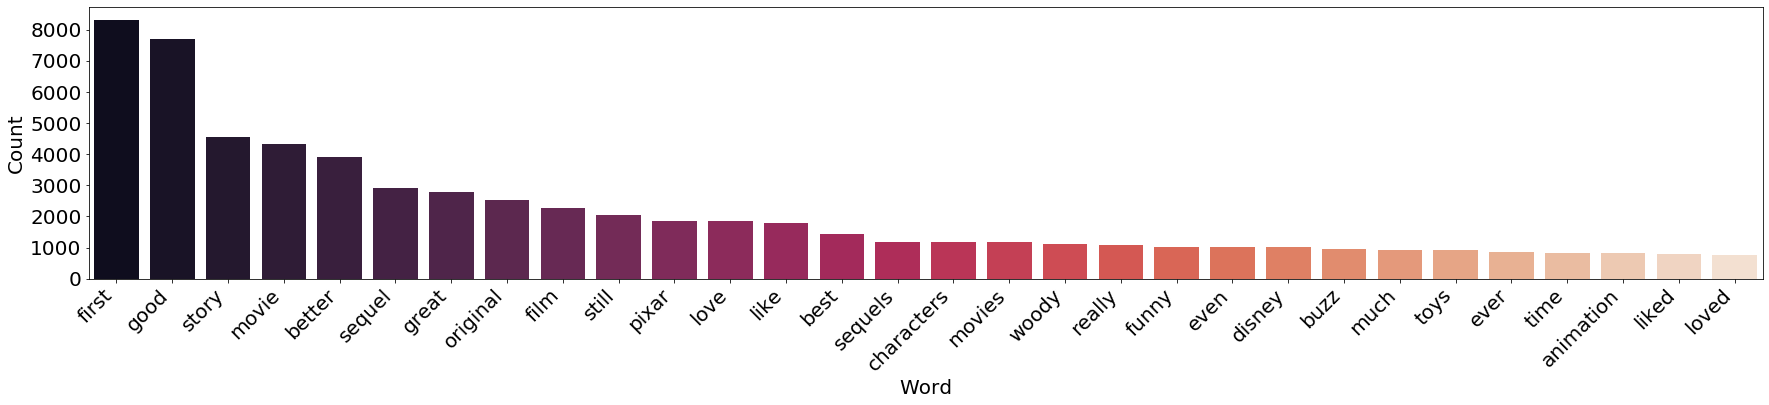

In [45]:
# Plots after removing stop words, short words, urls, numbers, special characters, etc (tokenizing)
# Toy Story 2
new_word_frequency_barplot(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story2_df['review_text'])))), 30)

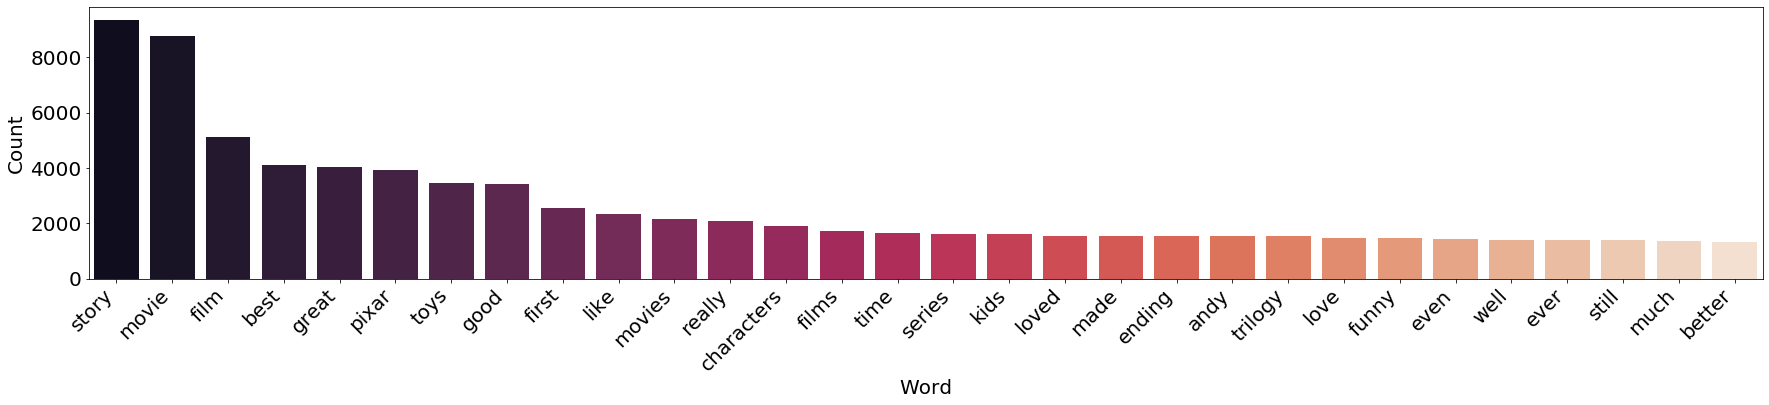

In [46]:
# Plots after removing stop words, short words, urls, numbers, special characters, etc (tokenizing)
# Toy Story 3
new_word_frequency_barplot(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story3_df['review_text'])))), 30)

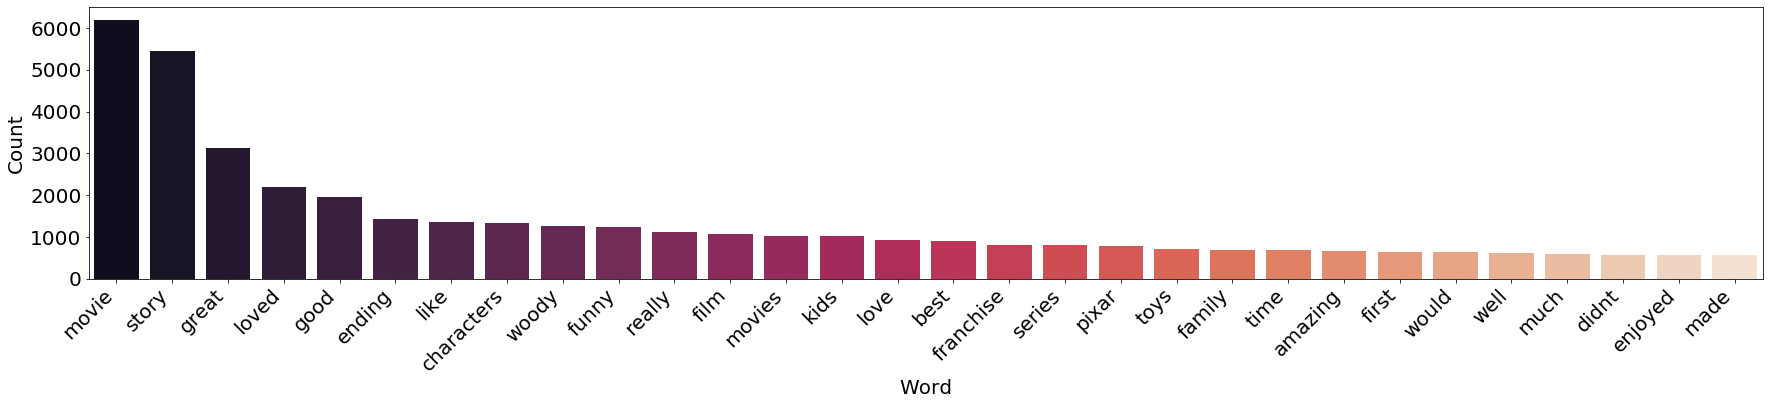

In [47]:
# Plots after removing stop words, short words, urls, numbers, special characters, etc (tokenizing)
# Toy Story 4
new_word_frequency_barplot(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story4_df['review_text'])))), 30)

In [9]:
    # Remove noise from the text we can use lemmatization from the spaCy library
    # filter noun and adjective
    # This simplifies words to their base form. For example, its changes 'characters' to 'character'
    def lemmatization(df, tags):
        if tags is None:
            tags = ['NOUN', 'ADJ']
        result_output = []
        for words in df:
            df = nlp(words)
            result_output.append([token.lemma_ for token in df if token.pos_ in tags])
        while [] in result_output:
            result_output.remove([])
        return result_output

In [10]:
    # Function to detokenize lemmatization
    def detokenize(df):
        new_df = []

        for x in range(len(df)):
            new_df.append(' '.join(df[x]))

        return new_df

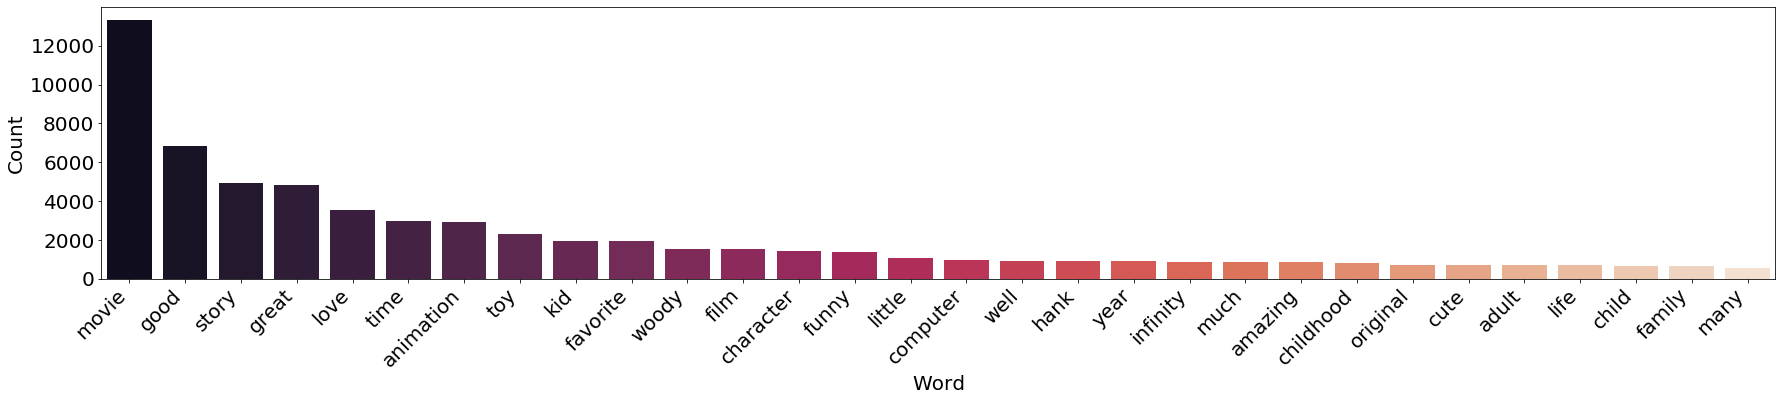

In [50]:
# Using bar plot function after detokenizing the lemmatization in the previous step to see word frequency
# Takes long to run
# Toy Story
new_word_frequency_barplot(detokenize(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story_df['review_text'])))), None)), 30)

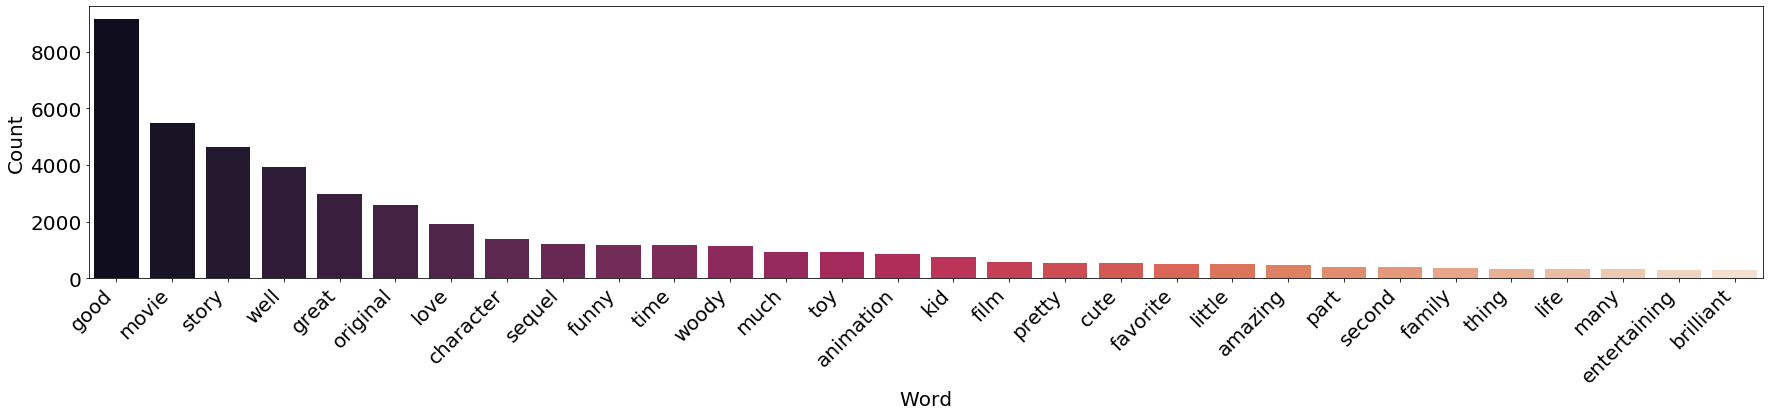

In [51]:
# Using bar plot function after detokenizing the lemmatization in the previous step to see word frequency
# Takes long to run
# Toy Story 2
new_word_frequency_barplot(detokenize(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story2_df['review_text'])))), None)), 30)

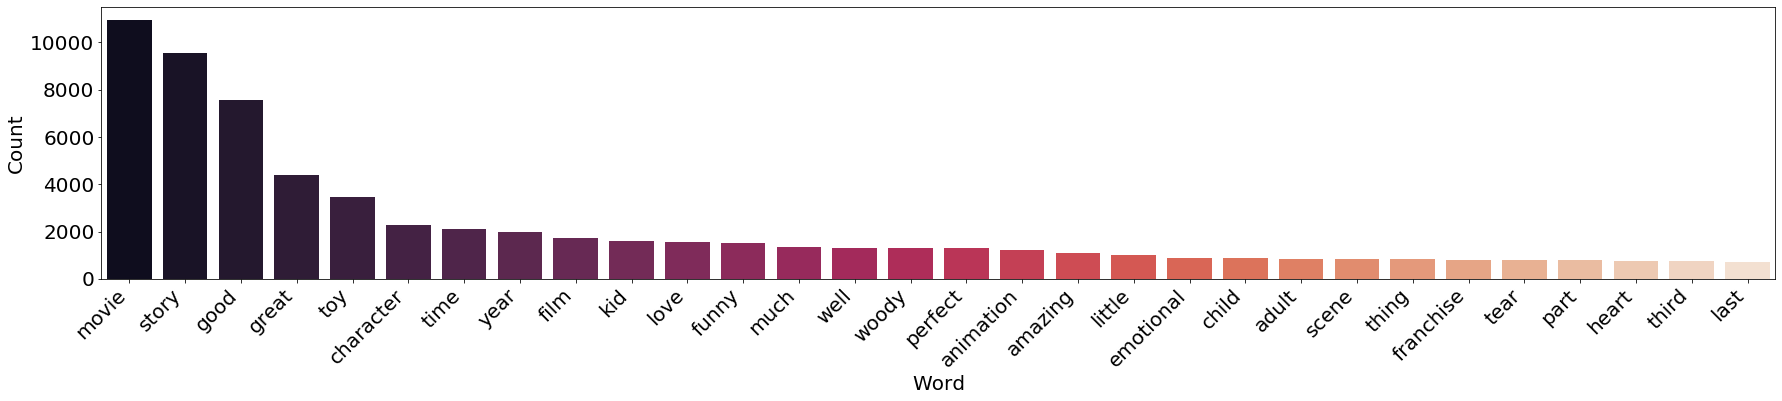

In [52]:
# Using bar plot function after detokenizing the lemmatization in the previous step to see word frequency
# Takes long to run
# Toy Story 3
new_word_frequency_barplot(detokenize(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story3_df['review_text'])))), None)), 30)

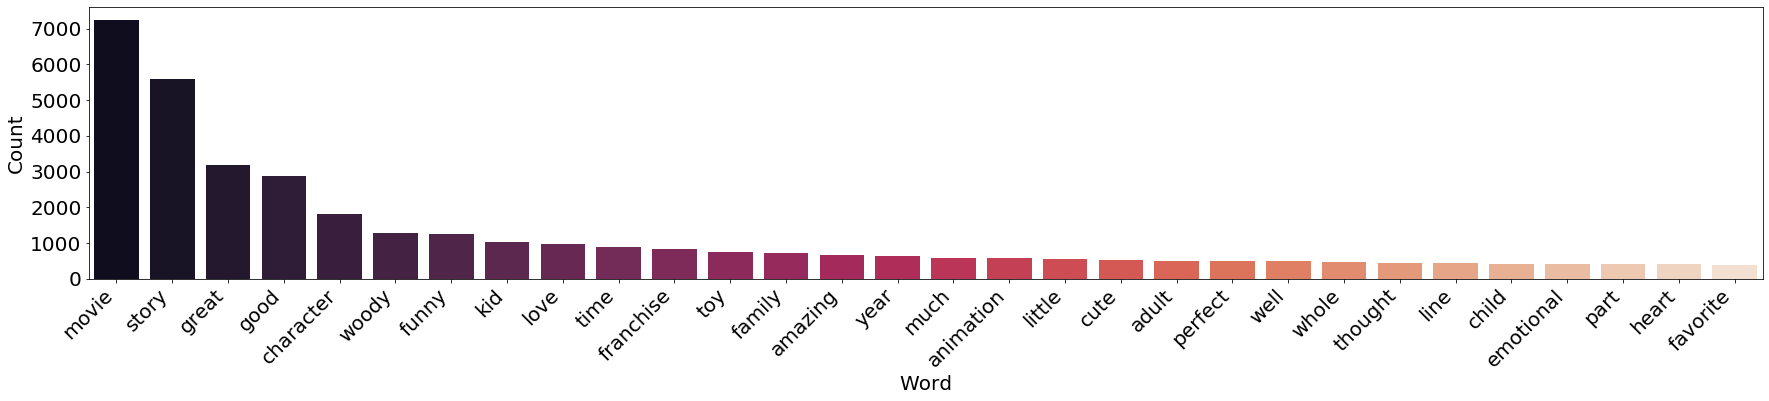

In [53]:
# Using bar plot function after detokenizing the lemmatization in the previous step to see word frequency
# Takes long to run
# Toy Story 4
new_word_frequency_barplot(detokenize(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story4_df['review_text'])))), None)), 30)

In [11]:
# Building LDA Model
def lda_model(df, num_topics_limit):
        dict = corpora.Dictionary(df)
        doc_word_matrix = [dict.doc2bow(words) for words in df]

        # Creating the object for LDA model using gensim library
        LDA = gensim.models.ldamodel.LdaModel

        # Build LDA model
        final_model = LDA(corpus=doc_word_matrix, id2word=dict, num_topics=num_topics_limit, random_state=100, chunksize=1000, passes=50)

        # Build Coherence Model
        # coh_model = CoherenceModel(model=final_model, corpus=doc_word_matrix, coherence='u_mass')
        coh_model = CoherenceModel(model=final_model, texts=df, dictionary=dict, coherence='c_v')

        # Calculating baseline coherence score
        coh_lda_model_check = coh_model.get_coherence()
        print('LDA Model - Coherence Score:')
        print(coh_lda_model_check)
        print('')

        # Print the number of topics from the lemmantized words that are relevant
        print('LDA Model - Topic Results:')
        for t in final_model.show_topics():
            print(t[0], t[1])

In [12]:
# LDA Model and Coherence Score
# Takes long to run
# Toy Story
lda_model(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story_df['review_text'])))), None), 20)

LDA Model - Coherence Score:
0.7142965991105661

LDA Model - Topic Results:
5 0.270*"favourite" + 0.249*"life" + 0.096*"idea" + 0.087*"boring" + 0.045*"special" + 0.026*"choice" + 0.026*"less" + 0.021*"short" + 0.015*"perfection" + 0.014*"trip"
17 0.377*"character" + 0.265*"amazing" + 0.089*"cast" + 0.065*"cartoon" + 0.034*"week" + 0.021*"side" + 0.021*"imaginative" + 0.018*"present" + 0.011*"delightful" + 0.006*"stunning"
12 0.355*"hank" + 0.213*"cool" + 0.113*"wonderful" + 0.094*"friendship" + 0.037*"space" + 0.033*"mind" + 0.032*"achievement" + 0.016*"experience" + 0.010*"originality" + 0.006*"amusing"
2 0.237*"childhood" + 0.185*"brilliant" + 0.180*"child" + 0.078*"today" + 0.075*"star" + 0.057*"room" + 0.057*"joke" + 0.016*"future" + 0.010*"century" + 0.006*"soul"
0 0.501*"kid" + 0.135*"pretty" + 0.052*"style" + 0.052*"action" + 0.029*"point" + 0.028*"high" + 0.022*"small" + 0.021*"timeless" + 0.016*"exciting" + 0.016*"title"
6 0.956*"movie" + 0.017*"part" + 0.007*"visual" + 0.002

In [13]:
# LDA Model and Coherence Score
# Takes long to run
# Toy Story 2
lda_model(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story2_df['review_text'])))), None), 20)

LDA Model - Coherence Score:
0.7212443172419254

LDA Model - Topic Results:
12 0.477*"woody" + 0.157*"thing" + 0.093*"plot" + 0.079*"work" + 0.045*"less" + 0.020*"song" + 0.006*"screenplay" + 0.004*"nature" + 0.002*"push" + 0.000*"line"
9 0.777*"great" + 0.059*"hilarious" + 0.058*"enough" + 0.012*"twist" + 0.011*"depth" + 0.008*"car" + 0.007*"creative" + 0.004*"rich" + 0.004*"deserve" + 0.003*"compelling"
8 0.806*"story" + 0.043*"excellent" + 0.024*"humor" + 0.023*"bad" + 0.022*"computer" + 0.019*"different" + 0.009*"solid" + 0.009*"installment" + 0.003*"top" + 0.002*"unique"
7 0.871*"good" + 0.056*"cute" + 0.024*"hank" + 0.011*"infinity" + 0.008*"true" + 0.005*"addition" + 0.003*"show" + 0.002*"play" + 0.001*"purpose" + 0.001*"development"
2 0.442*"pretty" + 0.103*"heart" + 0.061*"least" + 0.041*"home" + 0.032*"actor" + 0.031*"return" + 0.028*"question" + 0.027*"several" + 0.022*"deal" + 0.021*"storytelling"
10 0.526*"little" + 0.153*"one" + 0.050*"stinky" + 0.044*"incredible" + 0.012

In [14]:
# LDA Model and Coherence Score
# Takes long to run
# Toy Story 3
lda_model(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story3_df['review_text'])))), None), 20)

LDA Model - Coherence Score:
0.7278109763756199

LDA Model - Topic Results:
15 0.330*"touching" + 0.180*"family" + 0.076*"hank" + 0.060*"money" + 0.048*"effect" + 0.029*"solid" + 0.026*"detail" + 0.025*"excitement" + 0.023*"performance" + 0.023*"start"
4 0.836*"story" + 0.062*"third" + 0.036*"dark" + 0.012*"trilogy" + 0.008*"screenplay" + 0.005*"talk" + 0.004*"difficult" + 0.003*"amazed" + 0.002*"beauty" + 0.001*"member"
9 0.276*"much" + 0.187*"amazing" + 0.140*"many" + 0.059*"full" + 0.048*"one" + 0.036*"other" + 0.034*"interesting" + 0.031*"return" + 0.030*"entire" + 0.018*"important"
19 0.251*"child" + 0.218*"franchise" + 0.126*"work" + 0.086*"cast" + 0.058*"predecessor" + 0.041*"unkrich" + 0.033*"favourite" + 0.024*"memorable" + 0.023*"entry" + 0.021*"week"
17 0.493*"plot" + 0.173*"hilarious" + 0.065*"opening" + 0.038*"easy" + 0.033*"entertainment" + 0.025*"ability" + 0.018*"impressed" + 0.010*"achievement" + 0.004*"intriguing" + 0.000*"thread"
11 0.716*"good" + 0.073*"tear" + 0.05

In [15]:
# LDA Model and Coherence Score
# Takes long to run
# Toy Story 4
lda_model(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story4_df['review_text'])))), None), 25)

LDA Model - Coherence Score:
0.6678939740742479

LDA Model - Topic Results:
17 0.469*"final" + 0.024*"price" + 0.022*"edge" + 0.000*"carnival" + 0.000*"front" + 0.000*"artist" + 0.000*"dusty" + 0.000*"metal" + 0.000*"believability" + 0.000*"playground"
10 0.397*"place" + 0.058*"crazy" + 0.000*"dusty" + 0.000*"classroom" + 0.000*"front" + 0.000*"artist" + 0.000*"metal" + 0.000*"carnival" + 0.000*"mutual" + 0.000*"believability"
9 0.391*"cast" + 0.203*"trash" + 0.013*"design" + 0.000*"metal" + 0.000*"unleash" + 0.000*"front" + 0.000*"popsicle" + 0.000*"artist" + 0.000*"classroom" + 0.000*"carnival"
4 0.966*"movie" + 0.015*"nice" + 0.000*"goer" + 0.000*"carnival" + 0.000*"front" + 0.000*"artist" + 0.000*"metal" + 0.000*"dusty" + 0.000*"mutual" + 0.000*"believability"
0 0.739*"moment" + 0.016*"regard" + 0.000*"metal" + 0.000*"unleash" + 0.000*"front" + 0.000*"putty" + 0.000*"artist" + 0.000*"playground" + 0.000*"classroom" + 0.000*"stick"
8 0.230*"special" + 0.072*"production" + 0.065*"vie

In [16]:
    def coherence_model_chart(df, num_topics_limit, start_chart, step_chart):
        dict = corpora.Dictionary(df)
        doc_word_matrix = [dict.doc2bow(words) for words in df]

        # Creating the object for LDA model using gensim library
        LDA = gensim.models.ldamodel.LdaModel

        coh_values = []
        final_model_list = []
        for num_topics in range(start_chart, num_topics_limit, step_chart):
            model = LDA(corpus=doc_word_matrix, id2word=dict, num_topics=num_topics)
            final_model_list.append(model)
            coh_model = CoherenceModel(model=model, texts=df, dictionary=dict, coherence='c_v')
            coh_values.append(coh_model.get_coherence())

        # Show graph
        limit = num_topics_limit
        start = start_chart
        step = step_chart
        x = range(start, limit, step)
        plt.plot(x, coh_values)
        plt.xlabel('# of Topics')
        plt.ylabel("Coherence Score")
        plt.legend('coh_values', loc='best')
        plt.show()

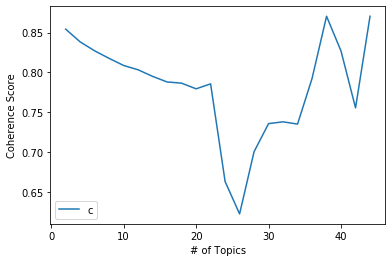

In [68]:
# Coherence Model Chart - Shows Coherence score vs. number of topics
# Takes long to run
# Toy Story
coherence_model_chart(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story_df['review_text'])))), None), 45, 2, 2)

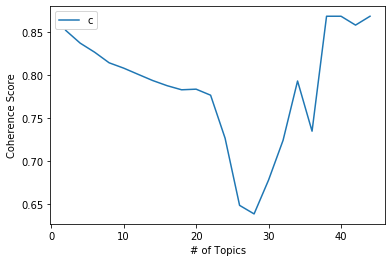

In [69]:
# Coherence Model Chart - Shows coherence score vs. number of topics
# Takes long to run
# Toy Story 2
coherence_model_chart(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story2_df['review_text'])))), None), 45, 2, 2)

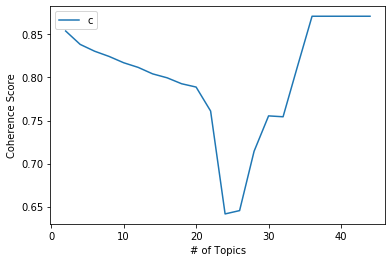

In [70]:
# Coherence Model Chart - Shows coherence score vs. number of topics
# Takes long to run
# Toy Story 3
coherence_model_chart(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story3_df['review_text'])))), None), 45, 2, 2)

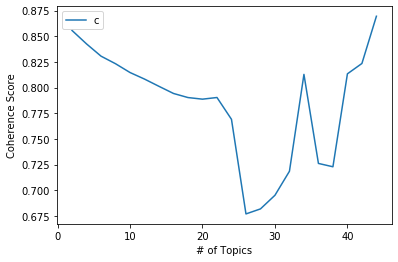

In [71]:
# Coherence Model Chart - Shows coherence score vs. number of topics
# Takes long to run
# Toy Story 4
coherence_model_chart(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story4_df['review_text'])))), None), 45, 2, 2)

In [81]:
    def visualize_lda(df, num_topics_limit):
        dict = corpora.Dictionary(df)
        doc_word_matrix = [dict.doc2bow(words) for words in df]

        # Creating the object for LDA model using gensim library
        LDA = gensim.models.ldamodel.LdaModel

        # Build LDA model
        final_model = LDA(corpus=doc_word_matrix, id2word=dict, num_topics=num_topics_limit, random_state=100,
                          chunksize=1000, passes=50)

        # Visualize topics
        topics_viz = pyLDAvis.gensim.prepare(final_model, doc_word_matrix, dict, mds='mmds')
        pyLDAvis.show(topics_viz)

In [ ]:
# Visualize Topics for Toy Story
# Open in new webpage
# Takes long to run
visualize_lda(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story_df['review_text'])))), None), 25)

C:\Users\vaibh\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8891/    [Ctrl-C to exit]


127.0.0.1 - - [30/Nov/2019 19:38:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2019 19:39:06] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2019 19:39:11] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [30/Nov/2019 19:39:12] "GET /LDAvis.js HTTP/1.1" 200 -


In [ ]:
# Visualize Topics for Toy Story 2
# Open in new webpage
# Takes long to run
visualize_lda(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story2_df['review_text'])))), None), 25)

In [ ]:
# Visualize Topics for Toy Story 3
# Open in new webpage
# Takes long to run
visualize_lda(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story3_df['review_text'])))), None), 25)

In [ ]:
# Visualize Topics for Toy Story 4
# Open in new webpage
# Takes long to run
visualize_lda(lemmatization(remove_short_words(remove_stop_words(remove_url(text_clean(toy_story4_df['review_text'])))), None), 25)